In [ ]:
import pandas as pd

In [ ]:
# 1. 나눔고딕 폰트 설치
!apt-get -qq -y install fonts-nanum

# 2. 런타임에 설치된 폰트 강제로 리로드
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

# 설치된 폰트 목록에 NanumGothic 있는지 확인
font_list = fm.findSystemFonts(fontpaths='/usr/share/fonts/truetype/nanum')
for font in font_list:
    fm.fontManager.addfont(font)


Selecting previously unselected package fonts-nanum.
(Reading database ... 126319 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


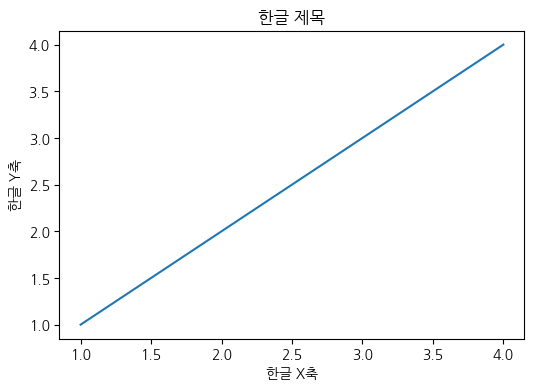

In [ ]:
# prompt: 한국어가 꺠지지 않고 그래프에서 출력되게 해 줘

import matplotlib.pyplot as plt
# 3. 폰트 설정

# matplotlib의 기본 폰트를 나눔고딕으로 설정
mpl.rc('font', family='NanumGothic')

# 마이너스 부호가 깨지지 않도록 설정
mpl.rc('axes', unicode_minus=False)

# 4. 테스트 그래프 그리기 (선택 사항)
# 아래 코드는 나눔고딕 폰트가 잘 적용되었는지 확인하기 위한 예시입니다.
# 실제 그래프를 그릴 때는 아래 코드를 필요에 따라 수정하거나 삭제하세요.
plt.figure(figsize=(6,4))
plt.plot([1,2,3,4], [1,2,3,4])
plt.title('한글 제목')
plt.xlabel('한글 X축')
plt.ylabel('한글 Y축')
plt.show()

In [ ]:
디지털 = pd.read_csv('디지털_최종.csv')
#디지털 = pd.read_csv('/content/디지털_데이터.CSV',encoding='cp949')
#논디지털 = pd.read_csv('논디지털_최종.csv'
논디지털 = pd.read_csv('논디지털_최종.csv')

In [ ]:
디지털_x = 디지털.drop(columns=[디지털.columns[1], 디지털.columns[2], 디지털.columns[3], 디지털.columns[4], 디지털.columns[5], 디지털.columns[6], 디지털.columns[7], 디지털.columns[8],디지털.columns[9],디지털.columns[10]])
논디지털_x = 논디지털.drop(columns=[논디지털.columns[1], 논디지털.columns[2], 논디지털.columns[3], 논디지털.columns[4], 논디지털.columns[5], 논디지털.columns[6],논디지털.columns[7],논디지털.columns[8],논디지털.columns[9],논디지털.columns[10]])


In [ ]:
디지털_x = 디지털_x.dropna()
논디지털_x = 논디지털_x.dropna()
디지털_x = 디지털_x.replace('-', 0)
논디지털_x = 논디지털_x.replace('-', 0)

In [ ]:
# 공통적으로 적용
디지털_x = 디지털_x.drop(columns=[col for col in 디지털_x.columns if col.startswith('교원수')])
논디지털_x = 논디지털_x.drop(columns=[col for col in 논디지털_x.columns if col.startswith('교원수')])
디지털_x = 디지털_x.drop(columns=[col for col in 디지털_x.columns if col.startswith('설립')])
논디지털_x = 논디지털_x.drop(columns=[col for col in 논디지털_x.columns if col.startswith('설립')])
디지털_x = 디지털_x.drop(columns=[col for col in 디지털_x.columns if col.startswith('60')])
논디지털_x = 논디지털_x.drop(columns=[col for col in 논디지털_x.columns if col.startswith('60')])
#디지털_x = 디지털_x.drop(columns=[col for col in 디지털_x.columns if col.startswith('특')])
#논디지털_x = 논디지털_x.drop(columns=[col for col in 논디지털_x.columns if col.startswith('특')])


In [ ]:
# 처리군/통제군 라벨 부여
디지털_x['treated'] = 1
논디지털_x['treated'] = 0

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# 공통 변수만 추출 (학교명, 라벨 등 제외)
common_columns = 디지털_x.columns.intersection(논디지털_x.columns)
features = common_columns.drop(['학교명', 'treated'], errors='ignore')  # 제외할 열명 조정

scaler = StandardScaler()

# 디지털_x 스케일링
디지털_x_scaled = 디지털_x.copy()
디지털_x_scaled[features] = scaler.fit_transform(디지털_x[features])

# 논디지털_x 스케일링
논디지털_x_scaled = 논디지털_x.copy()
논디지털_x_scaled[features] = scaler.transform(논디지털_x[features])


In [ ]:
논디지털.shape

(300, 122)

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors


# 3. 데이터 병합
df = pd.concat([디지털_x_scaled, 논디지털_x_scaled], ignore_index=True)
school_name_col = df.columns[0]  # 학교명 열 이름 저장

# 4. X, y 지정
X = df.drop(columns=[school_name_col, 'treated'])
y = df['treated']

# 6. L1 로지스틱 회귀 학습 (변수 선택용)
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model_l1.fit(X, y)

# 7. 변수 중요도 계산
coef_abs = np.abs(model_l1.coef_).flatten()
variable_importance = pd.Series(coef_abs, index=X.columns)

# 8. 중요도 높은 변수 상위 10개 선택
variable_importance_sorted = variable_importance.sort_values(ascending=False)
top_n = 15
selected_vars_new = variable_importance_sorted.head(top_n).index.tolist()

# 8. 중요도 높은 변수 상위 9개 선택 후 '교사당학생수' 추가
top_n = 15
selected_vars_new = variable_importance_sorted.head(top_n).index.tolist()

exclude_var = ['사설학원수','3학년_학생수_여']     # 제외할 변수명 (실제 변수명 그대로 입력)
add_var = '교원1인당_학생수'                    # 추가할 변수명 (실제 변수명으로 바꿔야 함)

# 변수 목록에서 제외 변수 제거
selected_vars_new = [v for v in selected_vars_new if v != exclude_var]

# 추가 변수 포함 (중복 방지)
if add_var not in selected_vars_new:
    selected_vars_new.append(add_var)

print("변수 중요도 순위:\n", variable_importance_sorted)
print("선택된 변수 (상위 10개):", selected_vars_new)

# 9. 선택된 변수만 사용해 스케일링 다시
X_selected_new = X[selected_vars_new]
X_selected_scaled_new = scaler.fit_transform(X_selected_new)

# 10. 선택된 변수로 성향점수 계산
model_new = LogisticRegression(solver='liblinear')
model_new.fit(X_selected_scaled_new, y)
df['pscore'] = model_new.predict_proba(X_selected_scaled_new)[:, 1]


변수 중요도 순위:
 학업중단자수            0.645163
1학년_학급수           0.572728
인구_천명당_사설학원수      0.481094
전출                0.375628
사설학원수             0.259637
                    ...   
구성비               0.000000
1인당_지역내총생산(천원)    0.000000
추계인구              0.000000
수준지수              0.000000
주민등록인구            0.000000
Length: 67, dtype: float64
선택된 변수 (상위 10개): ['학업중단자수', '1학년_학급수', '인구_천명당_사설학원수', '전출', '사설학원수', '3학년_학생수_여', '학생수', '수준별교실', '특별교실', '특수학급_학급수', '특수학급_학생수_남', '일반교실', '정규직원_남', '특수학급_학생수_여', '교지면적', '교원1인당_학생수']


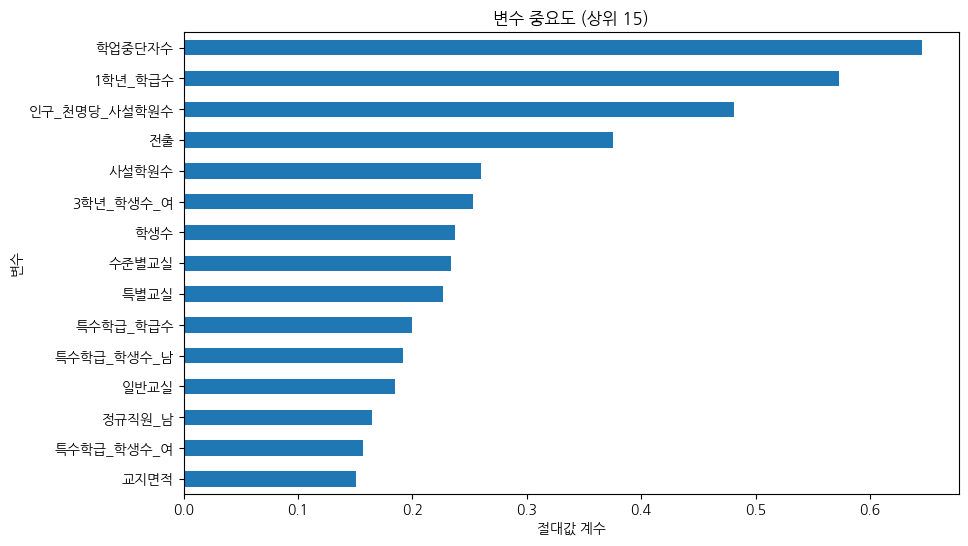

In [ ]:
# prompt: 위에서 만든 변수 중요도 시각화 할래

import matplotlib.pyplot as plt
# 9. 변수 중요도 시각화
plt.figure(figsize=(10, 6))
variable_importance_sorted.head(top_n).plot(kind='barh') # 상위 n개 변수 시각화
plt.title('변수 중요도 (상위 {})'.format(top_n))
plt.xlabel('절대값 계수')
plt.ylabel('변수')
plt.gca().invert_yaxis()  # 중요도 높은 변수가 위에 오도록 y축 순서 반전
plt.show()


In [ ]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd

k = 3 # 통제군에서 매칭할 학교 수

# 처리군과 통제군 분리
treated = df[df['treated'] == 1].copy()
control = df[df['treated'] == 0].copy()

# 최근접 이웃 k명 찾기 (pscore 기준)
nn = NearestNeighbors(n_neighbors=k, algorithm='ball_tree')
nn.fit(control[['pscore']])
distances, indices = nn.kneighbors(treated[['pscore']])

# 매칭 결과 정리 (처리군 한 명당 k명 통제군)
matched_pairs_list = []
for i, treated_idx in enumerate(treated.index):
    for j in range(k):
        control_idx = control.index[indices[i][j]]
        matched_pairs_list.append({
            '디지털학교': treated.loc[treated_idx, df.columns[0]],  # 학교명 열
            '매칭된_일반학교': control.loc[control_idx, df.columns[0]],
            '디지털_pscore': treated.loc[treated_idx, 'pscore'],
            '일반_pscore': control.loc[control_idx, 'pscore'],
            '성향점수_차이': abs(treated.loc[treated_idx, 'pscore'] - control.loc[control_idx, 'pscore'])
        })

matched_pairs_knn = pd.DataFrame(matched_pairs_list)

print(matched_pairs_knn.head())

            디지털학교 매칭된_일반학교  디지털_pscore  일반_pscore   성향점수_차이
0  건국대학교사범대학부속중학교    성수중학교    0.242359   0.242799  0.000439
1  건국대학교사범대학부속중학교    동북중학교    0.242359   0.243606  0.001247
2  건국대학교사범대학부속중학교    중동중학교    0.242359   0.244872  0.002513
3           경일중학교    동마중학교    0.074606   0.074548  0.000059
4           경일중학교    은평중학교    0.074606   0.074893  0.000286


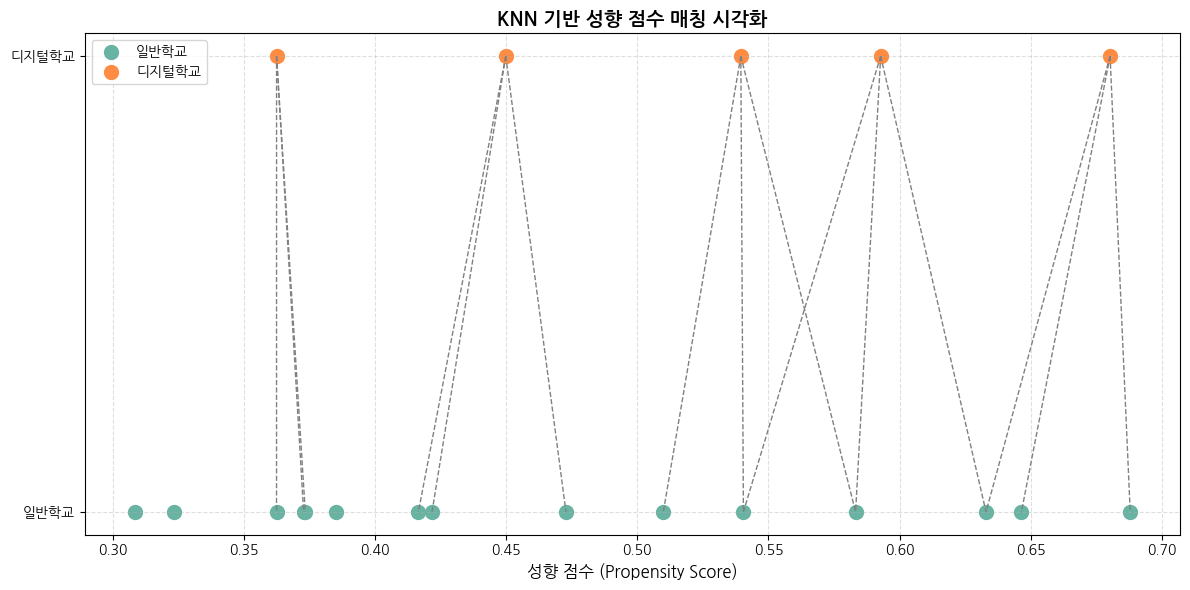

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import numpy as np

# 한글 폰트 설정 (Mac/Windows/Linux 환경에 따라 변경 가능)
#plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows: 'Malgun Gothic', macOS: 'AppleGothic'

# 샘플 데이터 생성
np.random.seed(42)
treated_scores = np.sort(np.random.uniform(0.3, 0.7, 5))
control_scores = np.sort(np.random.uniform(0.3, 0.7, 15))

treated = pd.DataFrame({'학교명': [f'디지털학교{i+1}' for i in range(5)],
                        'pscore': treated_scores, 'treated': 1})
control = pd.DataFrame({'학교명': [f'일반학교{i+1}' for i in range(15)],
                        'pscore': control_scores, 'treated': 0})

# 매칭
k = 3
nn = NearestNeighbors(n_neighbors=k)
nn.fit(control[['pscore']])
distances, indices = nn.kneighbors(treated[['pscore']])

# 시각화
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(control['pscore'], np.zeros_like(control['pscore']), c='#69b3a2', s=100, label='일반학교')
ax.scatter(treated['pscore'], np.ones_like(treated['pscore']), c='#ff8c42', s=100, label='디지털학교')

# 매칭선 그리기
for i, treated_idx in enumerate(treated.index):
    for j in range(k):
        control_idx = control.index[indices[i][j]]
        ax.plot([treated.loc[treated_idx, 'pscore'], control.loc[control_idx, 'pscore']],
                [1, 0], color='gray', linestyle='--', linewidth=1)

# 축/라벨 설정
ax.set_yticks([0, 1])
ax.set_yticklabels(['일반학교', '디지털학교'])
ax.set_xlabel('성향 점수 (Propensity Score)', fontsize=12)
ax.set_title('KNN 기반 성향 점수 매칭 시각화', fontsize=14, fontweight='bold')
ax.legend(loc='upper left')
ax.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [ ]:
matched_pairs_knn

,디지털학교,매칭된_일반학교,디지털_pscore,일반_pscore,성향점수_차이
0,건국대학교사범대학부속중학교,성수중학교,0.242359,0.242799,0.000439
1,건국대학교사범대학부속중학교,동북중학교,0.242359,0.243606,0.001247
2,건국대학교사범대학부속중학교,중동중학교,0.242359,0.244872,0.002513
3,경일중학교,동마중학교,0.074606,0.074548,0.000059
4,경일중학교,은평중학교,0.074606,0.074893,0.000286
...,...,...,...,...,...
97,용산중학교,강남중학교,0.041487,0.041683,0.000196
98,용산중학교,경인중학교,0.041487,0.041726,0.000239
99,충암중학교,중앙중학교,0.272003,0.270843,0.001160
100,충암중학교,환일중학교,0.272003,0.269327,0.002677


In [ ]:
from scipy.stats import ttest_rel
import numpy as np
import pandas as pd

# 학업 성취도 변수명
성적열 = ['평균', '국어', '영어', '수학']

결과 = []

# 매칭된 학교별로 대응하는 성적 데이터 불러오기
for col in 성적열:
    treated_scores = []
    control_scores = []

    for _, row in matched_pairs_knn.iterrows():
        디지털학교명 = row['디지털학교']
        일반학교명 = row['매칭된_일반학교']

        # 원본 데이터에서 학교명과 성적 열로 값 가져오기
        treated_val = 디지털.loc[디지털.iloc[:, 0] == 디지털학교명, col].values
        control_val = 논디지털.loc[논디지털.iloc[:, 0] == 일반학교명, col].values

        if len(treated_val) > 0 and len(control_val) > 0:
            treated_scores.append(treated_val[0])
            control_scores.append(control_val[0])

    # 대응표본 t검정
    t_stat, p_val = ttest_rel(treated_scores, control_scores)

    # 효과 크기(Cohen's d) 계산
    score_diff = np.array(treated_scores) - np.array(control_scores)
    cohens_d = np.mean(score_diff) / np.std(score_diff, ddof=1)

    결과.append({
        '변수': col,
        '디지털 평균': np.mean(treated_scores),
        '일반 평균': np.mean(control_scores),
        't값': t_stat,
        'p값': p_val,
        "Cohen's d": cohens_d
    })

결과_df = pd.DataFrame(결과)
print(결과_df)


   변수    디지털 평균     일반 평균        t값        p값  Cohen's d
0  평균  0.794294  0.760961  2.273640  0.025104   0.225124
1  국어  0.894265  0.869873  2.589713  0.011024   0.256420
2  영어  0.766059  0.727892  2.073338  0.040686   0.205291
3  수학  0.723735  0.686039  2.151455  0.033824   0.213026


In [ ]:
# 1) 학교명과 수학 점수를 매핑하는 딕셔너리 생성 (반드시 함수 정의 전)
df = pd.concat([디지털, 논디지털], ignore_index=True)
score_dict = df.set_index(df.columns[0])['평균'].to_dict()
# 2) 매칭된 일반학교 점수 평균 구하는 함수
def get_control_mean_score(control_schools):
    scores = [score_dict.get(school, None) for school in control_schools]
    scores = [s for s in scores if s is not None]  # 결측치 제외
    if scores:
        return sum(scores) / len(scores)
    else:
        return None

# 3) 디지털 학교별 매칭된 일반학교 그룹 수학 점수 평균 계산
grouped = matched_pairs_knn.groupby('디지털학교')['매칭된_일반학교'].apply(list).reset_index()
grouped['일반학교_평균'] = grouped['매칭된_일반학교'].apply(get_control_mean_score)

# 4) 디지털 학교 수학 점수 추가
grouped['디지털학교_평균'] = grouped['디지털학교'].map(score_dict)

# 5) 수학 점수 차이 계산 (절대값)
grouped['평균_점수차이'] = (grouped['디지털학교_평균'] - grouped['일반학교_평균'])

# 6) 수학 점수 차이가 가장 큰 디지털 학교 찾기
max_diff_row = grouped.loc[grouped['평균_점수차이'].idxmax()]

print("수학 점수 차이가 가장 큰 디지털 학교:", max_diff_row['디지털학교'])
print("디지털 학교 평균 점수:", max_diff_row['디지털학교_평균'])
print("매칭된 일반 학교 그룹 평균 점수:", max_diff_row['일반학교_평균'])
print("평균 점수 차이:", max_diff_row['평균_점수차이'])


수학 점수 차이가 가장 큰 디지털 학교: 영훈국제중학교
디지털 학교 평균 점수: 0.983
매칭된 일반 학교 그룹 평균 점수: 0.6626666666666666
평균 점수 차이: 0.32033333333333336


In [ ]:
# prompt: grouped 을 디지털학교_평균 변수 내림차순으로 볼래

grouped.sort_values(by='디지털학교_평균', ascending=False)

,디지털학교,매칭된_일반학교,일반학교_평균,디지털학교_평균,평균_점수차이
22,영훈국제중학교,"[남대문중학교, 환일중학교, 중앙중학교]",0.662667,0.983,0.320333
9,목운중학교,"[무학중학교, 배재중학교, 삼각산중학교]",0.801333,0.964,0.162667
17,신사중학교,"[성암여자중학교, 영림중학교, 염창중학교]",0.775000,0.948,0.173000
19,언주중학교,"[동구여자중학교, 윤중중학교, 장위중학교]",0.825667,0.921,0.095333
13,선덕중학교,"[배재중학교, 삼각산중학교, 동성중학교]",0.719000,0.910,0.191000
12,서울여자중학교,"[문일중학교, 장승중학교, 숭실중학교]",0.723000,0.909,0.186000
33,휘문중학교,"[선정중학교, 무학중학교, 배재중학교]",0.750667,0.899,0.148333
20,염창중학교,"[염창중학교, 영림중학교, 성암여자중학교]",0.775000,0.885,0.110000
31,한영중학교,"[배재중학교, 삼각산중학교, 동성중학교]",0.719000,0.874,0.155000
2,경희여자중학교,"[전농중학교, 서연중학교, 성심여자중학교]",0.823000,0.863,0.040000


In [ ]:
from scipy.stats import ttest_rel
import numpy as np

results = []

# 디지털 학교별로 그룹핑
for digital_school, group in matched_pairs_knn.groupby('디지털학교'):
    # 디지털 학교 수학 점수
    treated_score = score_dict.get(digital_school)

    # 매칭된 일반 학교 수학 점수 리스트
    control_scores = [score_dict.get(school) for school in group['매칭된_일반학교'] if score_dict.get(school) is not None]

    # 결측치 확인 및 처리
    if treated_score is None or len(control_scores) == 0:
        continue

    # 디지털 학교 점수를 control_scores 길이에 맞게 복제 (paired test용)
    treated_scores = np.array([treated_score] * len(control_scores))
    control_scores = np.array(control_scores)

    # 대응표본 t-검정
    t_stat, p_val = ttest_rel(treated_scores, control_scores)

    # 결과 저장
    results.append({
        '디지털학교': digital_school,
        '처리군_평균': treated_score,
        '통제군_평균': control_scores.mean(),
        't-통계량': t_stat,
        'p-값': p_val
    })

# 결과 데이터프레임
results_df = pd.DataFrame(results)

# p-값 기준으로 정렬 (가장 유의한 것부터)
results_df = results_df[results_df['p-값']<=0.05].sort_values('처리군_평균')

results_df.tail(5)


,디지털학교,처리군_평균,통제군_평균,t-통계량,p-값
27,전동중학교,0.788,0.632333,7.182066,0.018840
33,휘문중학교,0.899,0.750667,4.329580,0.049425
12,서울여자중학교,0.909,0.723000,4.840840,0.040123
9,목운중학교,0.964,0.801333,6.838733,0.020720
22,영훈국제중학교,0.983,0.662667,6.554118,0.022497


In [ ]:
# 1) 수학 점수 차이 계산
results_df['점수차'] = results_df['처리군_평균'] - results_df['통제군_평균']

# 2) 점수차 기준 (상위 20%)
threshold = results_df['점수차'].quantile(0.7)

# 3) 유의미한 차이가 있는 학교 필터링 (p < 0.05 & 점수차 상위 20%)
significant_schools = results_df[
        (results_df['p-값'] < 0.05) & (results_df['점수차'] >= threshold)
]

# 4) 해당 학교 리스트 추출
sig_school_list = significant_schools['디지털학교'].tolist()

# 결과 확인
print("통계적으로 유의미하고 효과가 큰 학교 목록:")
print(sig_school_list)



통계적으로 유의미하고 효과가 큰 학교 목록:
['서울여자중학교', '목운중학교', '영훈국제중학교']


In [ ]:
#sig_school_list = sig_school_list[1:]
sig_school_list

['서울여자중학교', '목운중학교', '영훈국제중학교']

In [ ]:
# prompt: sig_school_list 이 리스트에서 영훈국제중학교는 뺄래
other_schools_data = 디지털[~디지털['학교명'].isin(sig_school_list)]
#sig_school_list.remove('영훈국제중학교')
sig_school_list


['서울여자중학교', '목운중학교', '영훈국제중학교']

In [ ]:
import pandas as pd

# 모든 열 출력
pd.set_option('display.max_columns', None)

# 모든 행 출력
pd.set_option('display.max_rows', None)

# 열 너비 제한 없이 출력
pd.set_option('display.max_colwidth', None)

# 전체 넓이 출력
pd.set_option('display.width', None)


In [ ]:
디지털.shape

(34, 122)

In [ ]:
# '학교명'이 컬럼명이라고 가정
top_schools_data = 디지털[디지털['학교명'].isin(sig_school_list)]


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# 숫자형 변수만 선택 (학교명 제외)
num_vars = 디지털.select_dtypes(include='number').columns.tolist()

# 만약 학교명을 포함하는 경우 제외
if '학교명' in num_vars:
    num_vars.remove('학교명')

# 그룹별 평균 계산
top_mean = top_schools_data[num_vars].mean()
other_mean = other_schools_data[num_vars].mean()

comparison_df = pd.DataFrame({'상위학교 평균': top_mean, '기타학교 평균': other_mean})
print(comparison_df)

# 변수별 t-검정 수행
for var in num_vars:
    group1 = top_schools_data[var].dropna()
    group2 = other_schools_data[var].dropna()
    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
    print(f'{var}: t={t_stat:.3f}, p={p_val:.4f}')


                     상위학교 평균       기타학교 평균
응시자_수           2.660000e+02  2.315806e+02
평균              9.520000e-01  7.790323e-01
국어              9.820000e-01  8.857742e-01
영어              9.663333e-01  7.466774e-01
수학              9.080000e-01  7.059032e-01
특목고_진학률         1.290000e-01  2.358065e-02
졸업자수            2.496667e+02  1.798710e+02
10대_이하          4.901767e+04  5.342790e+04
2030            1.024487e+05  1.235211e+05
4050            1.074587e+05  1.242526e+05
60대_이상          9.789433e+04  1.069286e+05
자치구_내_학생_총합     9.006000e+03  8.542355e+03
설립              2.666667e+00  2.387097e+00
남녀공학_구분         1.666667e+00  1.483871e+00
일반학급_학급수        2.800000e+01  2.093548e+01
일반학급_학생수_계      8.336667e+02  4.979032e+02
일반학급_학생수_남      3.106667e+02  2.909677e+02
일반학급_학생수_여      5.230000e+02  2.069355e+02
특수학급_학급수        6.666667e-01  5.483871e-01
특수학급_학생수_계      4.666667e+00  2.838710e+00
특수학급_학생수_남      1.000000e+00  1.967742e+00
특수학급_학생수_여      3.666667e+00  8.709677e-01
편성학급수_계    

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
pairwise_results = []

for digital_school, group in matched_pairs_knn.groupby('디지털학교'):
    treated_score = score_dict.get(digital_school)

    for control_school in group['매칭된_일반학교']:
        control_score = score_dict.get(control_school)

        if treated_score is None or control_score is None:
            continue

        effect = treated_score - control_score

        pairwise_results.append({
            '디지털학교': digital_school,
            '매칭된_일반학교': control_school,
            '처리군_점수': treated_score,
            '통제군_점수': control_score,
            '점수차': effect
        })

pairwise_df = pd.DataFrame(pairwise_results)


In [ ]:
pairwise_df['적용_예상점수'] = pairwise_df['통제군_점수'] + pairwise_df['점수차']

pairwise_df

,디지털학교,매칭된_일반학교,처리군_점수,통제군_점수,점수차,적용_예상점수
0,건국대학교사범대학부속중학교,성수중학교,0.688,0.824,-0.136,0.688
1,건국대학교사범대학부속중학교,동북중학교,0.688,0.820,-0.132,0.688
2,건국대학교사범대학부속중학교,중동중학교,0.688,0.846,-0.158,0.688
3,경일중학교,동마중학교,0.790,0.769,0.021,0.790
4,경일중학교,은평중학교,0.790,0.716,0.074,0.790
5,경일중학교,신관중학교,0.790,0.633,0.157,0.790
6,경희여자중학교,전농중학교,0.863,0.805,0.058,0.863
7,경희여자중학교,서연중학교,0.863,0.761,0.102,0.863
8,경희여자중학교,성심여자중학교,0.863,0.903,-0.040,0.863
9,광신중학교,당산서중학교,0.774,0.881,-0.107,0.774


회귀

/tmp/ipython-input-29-3068141226.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(matched_pairs_knn['디지털_pscore'], label='디지털학교', shade=True)
/tmp/ipython-input-29-3068141226.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(matched_pairs_knn['일반_pscore'], label='매칭된 일반학교', shade=True)


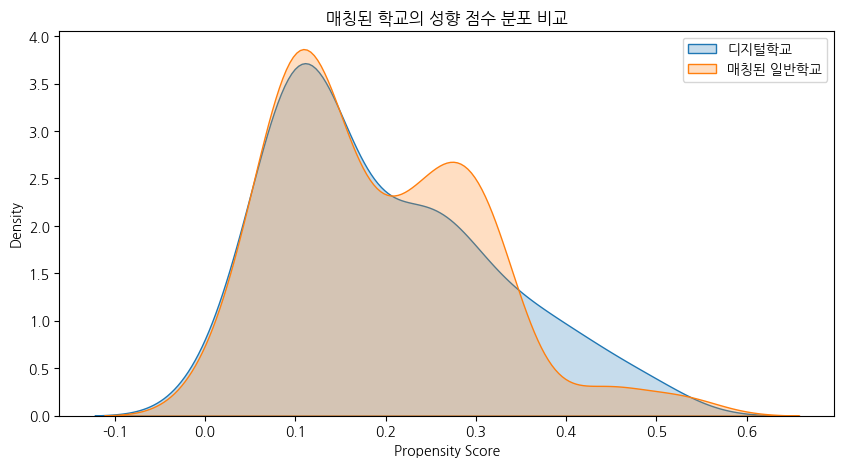

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.kdeplot(matched_pairs_knn['디지털_pscore'], label='디지털학교', shade=True)
sns.kdeplot(matched_pairs_knn['일반_pscore'], label='매칭된 일반학교', shade=True)
plt.title('매칭된 학교의 성향 점수 분포 비교')
plt.xlabel('Propensity Score')
plt.legend()
plt.show()


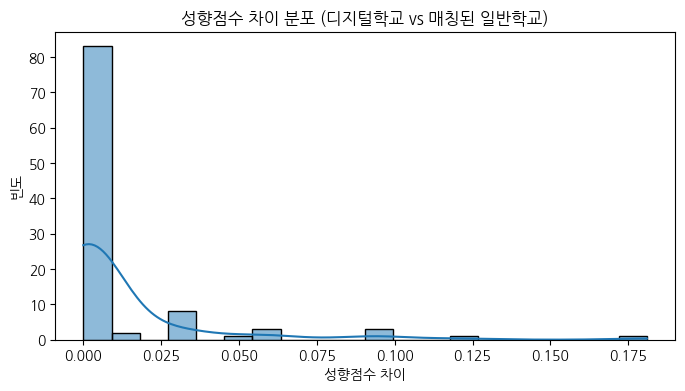

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(matched_pairs_knn['성향점수_차이'], bins=20, kde=True)
plt.title('성향점수 차이 분포 (디지털학교 vs 매칭된 일반학교)')
plt.xlabel('성향점수 차이')
plt.ylabel('빈도')
plt.show()


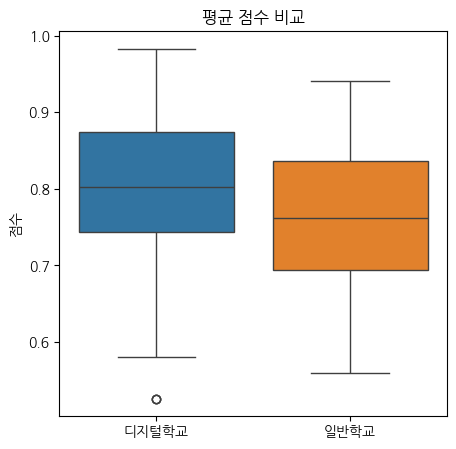

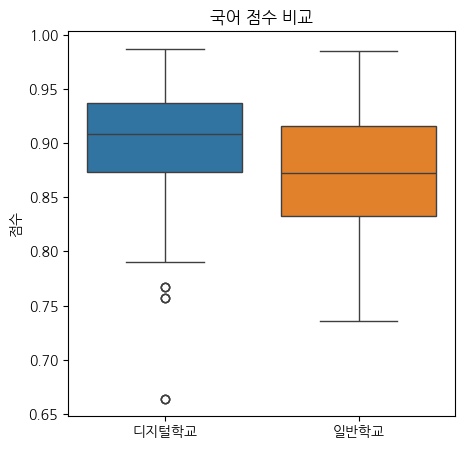

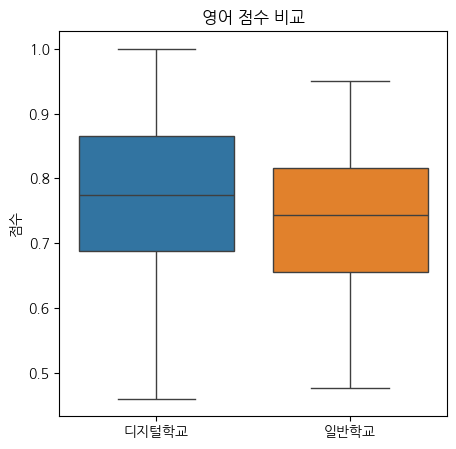

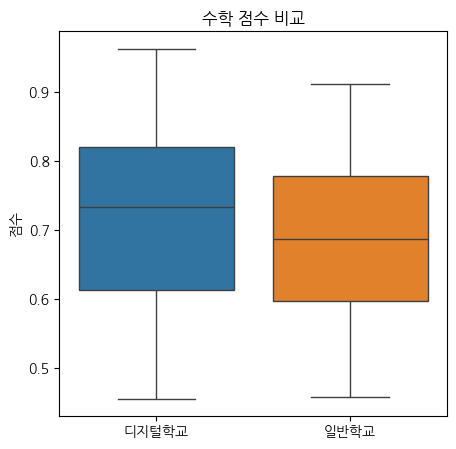

In [ ]:
성적열 = ['평균', '국어', '영어', '수학']

for col in 성적열:
    treated_scores = []
    control_scores = []

    for _, row in matched_pairs_knn.iterrows():
        디지털학교명 = row['디지털학교']
        일반학교명 = row['매칭된_일반학교']

        treated_val = 디지털.loc[디지털.iloc[:, 0] == 디지털학교명, col].values
        control_val = 논디지털.loc[논디지털.iloc[:, 0] == 일반학교명, col].values

        if len(treated_val) > 0 and len(control_val) > 0:
            treated_scores.append(treated_val[0])
            control_scores.append(control_val[0])

    # 시각화
    plt.figure(figsize=(5,5))
    sns.boxplot(data=[treated_scores, control_scores])
    plt.xticks([0, 1], ['디지털학교', '일반학교'])
    plt.title(f'{col} 점수 비교')
    plt.ylabel('점수')
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd

# 디지털 학교 데이터에 treated = 1 부여
디지털['treated'] = 1

# 일반(논디지털) 학교 데이터에 treated = 0 부여
논디지털['treated'] = 0

# 두 데이터프레임을 세로로 결합
df = pd.concat([디지털, 논디지털], ignore_index=True)
df= df.dropna()

df.head()


,학교명,응시자_수,평균,국어,영어,수학,특목고_진학률,특목고_진학수,졸업자수,구,동,10대_이하,2030,4050,60대_이상,자치구_내_학생_총합,설립,남녀공학_구분,일반학급_학급수,일반학급_학생수_계,일반학급_학생수_남,일반학급_학생수_여,특수학급_학급수,특수학급_학생수_계,특수학급_학생수_남,특수학급_학생수_여,편성학급수_계,1학년_학급수,2학년_학급수,3학년_학급수,학생수_총계_계,학생수_총계_남,학생수_총계_여,1학년_학생수_계,1학년_학생수_남,1학년_학생수_여,2학년_학생수_계,2학년_학생수_남,2학년_학생수_여,3학년_학생수_계,3학년_학생수_남,3학년_학생수_여,학급당학생수,교원수_총계_계,교원수_총계_남,교원수_총계_여,교원수_정규_계,교원수_정규_남,교원수_정규_여,교원수_정규_교장_계,교원수_정규_교장_남,교원수_정규_교장_여,교원수_정규_교감_계,교원수_정규_교감_남,교원수_정규_교감_여,교원수_정규_수석_계,교원수_정규_수석_남,교원수_정규_수석_여,교원수_정규_보직_계,교원수_정규_보직_남,교원수_정규_보직_여,교원수_정규_일반_계,교원수_정규_일반_남,교원수_정규_일반_여,교원수_정규_특수_계,교원수_정규_특수_남,교원수_정규_특수_여,교원수_정규_상담_계,교원수_정규_상담_남,교원수_정규_상담_여,교원수_정규_사서_계,교원수_정규_사서_남,교원수_정규_사서_여,교원수_정규_실기_계,교원수_정규_실기_남,교원수_정규_실기_여,교원수_정규_보건_계,교원수_정규_보건_남,교원수_정규_보건_여,교원수_정규_영양_계,교원수_정규_영양_남,교원수_정규_영양_여,교원수_기간제교원_계,교원수_기간제교원_남,교원수_기간제교원_여,교원1인당_학생수,전체직원_계,전체직원_남,전체직원_여,정규직원_계,정규직원_남,정규 직원_여,전출,전입,입학자_계,입학자_남,입학자_여,졸업자_계,졸업자_남,졸업자_여,진학자_계,진학자_남,진학자_여,진학률,일반교실,교과교실,특별교실,수준별교실,기타교실,교지면적,학생1인당교지면적,학생수,학업중단자수,학업중단율,지역내총생산(백만원),구성비,추계인구,1인당_지역내총생산(천원),수준지수,인구_천명당_사설학원수,사설학원수,주민등록인구,treated
0,건국대학교사범대학부속중학교,264,0.688,0.852,0.636,0.576,0.018,4명\n(1명/3명),211,광진구,자양동,39012,122876,105757,84845,6551,2.0,1.0,24.0,611.0,460.0,151.0,0.0,0.0,0.0,0.0,24.0,8.0,8.0,8.0,611.0,460.0,151.0,202.0,154.0,48.0,214.0,161.0,53.0,195.0,145.0,50.0,25.5,44.0,22.0,22.0,31.0,18.0,13.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,10.0,7.0,3.0,18.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,13.0,4.0,9.0,13.9,15.0,4.0,11.0,6.0,4.0,2.0,6.0,9.0,204.0,155.0,49.0,188.0,136.0,52.0,188.0,136.0,52.0,100.0,24.0,7.0,0.0,1.0,2.0,12469.0,20.4,6674,72,1.08,6554954,1.4,349926,18732,37.71,1.3,434,331963,1
1,경일중학교,127,0.790,0.905,0.764,0.701,0.020,2명\n(1명/1명),97,성동구,성수동1가,34018,90290,88192,72218,4160,3.0,1.0,12.0,208.0,103.0,105.0,0.0,0.0,0.0,0.0,12.0,4.0,4.0,4.0,208.0,103.0,105.0,68.0,37.0,31.0,74.0,41.0,33.0,66.0,25.0,41.0,17.3,23.0,6.0,17.0,21.0,5.0,16.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,9.0,0.0,9.0,9.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,9.0,12.0,2.0,10.0,2.0,1.0,1.0,7.0,6.0,66.0,36.0,30.0,84.0,36.0,48.0,83.0,36.0,47.0,98.8,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4339,37,0.85,13999893,3.0,287580,48682,97.99,1.1,313,273669,1
2,덕수중학교,90,0.581,0.767,0.500,0.478,0.059,4명\n(0명/4명),67,중구,인현동2가,12484,44229,41446,36795,1485,3.0,1.0,12.0,221.0,89.0,132.0,2.0,7.0,7.0,0.0,14.0,4.0,5.0,5.0,228.0,96.0,132.0,79.0,31.0,48.0,81.0,37.0,44.0,68.0,28.0,40.0,16.3,29.0,6.0,23.0,28.0,6.0,22.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,10.0,3.0,7.0,11.0,3.0,8.0,2.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,7.9,12.0,0.0,12.0,2.0,0.0,2.0,9.0,6.0,81.0,32.0,49.0,85.0,38.0,47.0,84.0,38.0,46.0,98.8,14.0,3.0,7.0,2.0,1.0,12914.0,56.6,1565,27,1.73,61342710,13.0,127427,481395,968.98,0.9,112,120544,1
3,서울대학교사범대학부설여자중학교,193,0.839,0.969,0.814,0.736,0.065,8명\n(0명/8명),123,종로구,동숭동,16185,48131,41076,41388,2373,1.0,3.0,18.0,306.0,0.0,306.0,1.0,5.0,0.0,5.0,19.0,6.0,6.0,7.0,311.0,0.0,311.0,106.0,0.0,106.0,105.0,0.0,105.0,100.0,0.0,100.0,16.4,51.0,19.0,32.0,37.0,16.0,21.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,6.0,6.0,23.0,9.0,14.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,3.0,11.0,6.1,9.0,2.0,7.0,3.0,2.0,1.0,6.0,3.0,103.0,0.0,103.0,125.0,0.0,125.0,125.0,0.0,125.0,100.0,19.0,11.0,17.0,0.0,4.0,14792.0,47.6,2481,34,1.37,35719537,7.6,149705,238599,480.27,1.6,216,138336,1
4,서울여자중학교,157,0.909,0.975,0.930,0.822,0.051,7명\n(1명/6명),137,마포구,염리동,46448,129116,123702,83326,6906,3.0,3.0,24.0,640.0,0.0,640.0,1.0,7.0,0.0,7.0,25.0,9.0,8.0,8.0,647.0,0.0,647.0,231.0,0.0,231.0,211.0,0.0,211.0,205.0,0.0,205.0,25.9,53.0,6.0,47.0,45.0,5.0,40.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,12.0,1.0,11.0,27.0,4.0,23.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,8.0,1.0,7.0,12.2,14.0,1.0,13.0,3.0,1.0,2.0,21.0,8.0,231.0,0.0,231.0,215.0,0.0,215.0,215.0,0.0,215.0,100.0,24.0,0.0,5.0,0.0,1.0,0.0,0.0,7209,75,1.04,213993

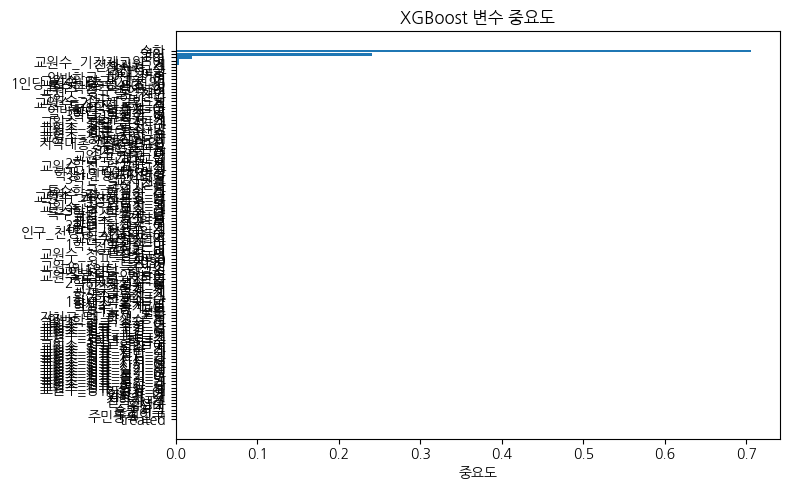

treated 변수 중요도:
          변수명  중요도
117  treated  0.0


In [ ]:
# 수치형 변수만 선택 (treated도 수치형으로 간주되기 때문에 포함됨)
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# 종속 변수(y) 지정
y = df['평균']  # 또는 '평균', '국어' 등

# 독립 변수(X): 수치형 변수 중 종속 변수 제외
features = [col for col in numeric_cols if col != '평균']
X = df[features]
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# 학습용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 특수기호 제거: 모든 변수 이름을 알파벳, 숫자, 밑줄(_)만 남기기
#df = df.rename(columns=lambda x: ''.join(char if char.isalnum() or char == '_' else '_' for char in x))

# 모델 정의 및 학습
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)
import matplotlib.pyplot as plt
import pandas as pd

# 변수 중요도 추출
importances = model.feature_importances_
importance_df = pd.DataFrame({
    '변수명': X.columns,
    '중요도': importances
}).sort_values('중요도', ascending=False)

# 시각화
plt.figure(figsize=(8, 5))
plt.barh(importance_df['변수명'], importance_df['중요도'])
plt.xlabel('중요도')
plt.title('XGBoost 변수 중요도')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# treated 변수 중요도 출력
treated_importance = importance_df[importance_df['변수명'] == 'treated']
print("treated 변수 중요도:\n", treated_importance)


In [ ]:
from xgboost import XGBRegressor

# 기존 회귀 모델 학습
features = ['treated' ,'학업중단자수', '1학년_학급수', '인구_천명당_사설학원수', '전출', '사설학원수', '3학년_학생수_여', '수준별교실', '학생수', '특별교실', '특수학급_학급수', '특수학급_학생수_남', '일반교실', '정규직원_남', '특수학급_학생수_여', '교지면적', '교원1인당_학생수']
X = df[features]
y = df['평균']
model = XGBRegressor()
model.fit(X, y)

# 일반학교 데이터만 추출
general_schools = df[df['treated'] == 0].copy()

# treated=0 상태 예측
general_schools['예측_원래'] = model.predict(general_schools[features])

# treated=1로 가정 (디지털 전환 시나리오)
general_schools['treated'] = 1
general_schools['예측_디지털'] = model.predict(general_schools[features])

# 디지털 전환 효과 계산
general_schools['예상_효과'] = general_schools['예측_디지털'] - general_schools['예측_원래']

# 효과가 큰 순서대로 정렬
recommendation = general_schools.sort_values('예상_효과', ascending=False)

print(recommendation[['학교명', '예상_효과']].head(10))


       학교명     예상_효과
78   남강중학교  0.020812
210  신관중학교  0.020758
50   경서중학교  0.020146
188  성서중학교  0.019204
147  봉림중학교  0.017555
208  숭인중학교  0.017239
290  전농중학교  0.016999
194  성일중학교  0.016893
44   강현중학교  0.016342
81   남성중학교  0.016136


In [ ]:
from scipy.stats import f_oneway

# 그룹별 디지털 전환 효과
공학 = general_schools[general_schools['남녀공학_구분'] == 1]['예상_효과'].dropna()
남자 = general_schools[general_schools['남녀공학_구분'] == 2]['예상_효과'].dropna()
여자 = general_schools[general_schools['남녀공학_구분'] == 3]['예상_효과'].dropna()

# ANOVA 수행
f_stat, p_val = f_oneway(공학, 남자, 여자)

print(f"F-통계량: {f_stat:.3f}, p-값: {p_val:.4f}")


F-통계량: 0.897, p-값: 0.4088


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# 데이터 준비
df_anova = general_schools[['예상_효과', '남녀공학_구분']].dropna()
df_anova['남녀공학_구분'] = df_anova['남녀공학_구분'].replace({1: '공학', 2: '남자', 3: '여자'})

# Tukey HSD test
tukey_result = pairwise_tukeyhsd(df_anova['예상_효과'], df_anova['남녀공학_구분'])
print(tukey_result)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    공학     남자  -0.0002 0.9971 -0.0053  0.005  False
    공학     여자  -0.0032 0.3757 -0.0087 0.0024  False
    남자     여자   -0.003 0.5857 -0.0101 0.0041  False
---------------------------------------------------


In [ ]:
# 줄바꿈(\n), 공백 등 특수문자 제거
df.columns = df.columns.str.replace('\n', '', regex=True)  # 줄바꿈 제거
df.columns = df.columns.str.strip()                        # 앞뒤 공백 제거

In [ ]:
df.columns

Index(['학교명', '응시자_수', '평균', '국어', '영어', '수학', '특목고_진학률', '특목고_진학수', '졸업자수',
       '구',
       ...
       '학업중단율', '지역내총생산(백만원)', '구성비', '추계인구', '1인당_지역내총생산(천원)', '수준지수',
       '인구_천명당_사설학원수', '사설학원수', '주민등록인구', 'treated'],
      dtype='object', length=123)

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# 3. X 변수 구성: 제외할 변수 빼고 나머지 수치형만 사용
features = ['treated' ,'학업중단자수', '1학년_학급수', '인구_천명당_사설학원수', '전출', '사설학원수', '3학년_학생수_여', '수준별교실', '학생수', '특별교실', '특수학급_학급수', '특수학급_학생수_남', '일반교실', '정규직원_남', '특수학급_학생수_여', '교지면적', '교원1인당_학생수']

corr_matrix = df[features].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
drop_cols = [col for col in upper.columns if any(upper[col] > 0.8)]
reduced_features = [col for col in features if col not in drop_cols]

# 2. 모델 학습
X = df[reduced_features]
y = df['평균']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# 3. 일반학교 예측
general_schools = df[df['treated'] == 0].copy()
general_schools['예측_원래'] = model.predict(general_schools[reduced_features])

# 4. treated = 1로 가정한 디지털 시나리오
general_schools['treated'] = 1
general_schools['예측_디지털'] = model.predict(general_schools[reduced_features])

# 5. 효과 계산
general_schools['예상_효과'] = general_schools['예측_디지털'] - general_schools['예측_원래']
recommendation = general_schools.sort_values('예상_효과', ascending=False)

print(drop_cols)
# 6. 추천 결과 출력
print("\n✅ 디지털 전환 효과 예측 상위 학교:")
print(recommendation[['학교명', '예상_효과']].head(10))


['인구_천명당_사설학원수', '사설학원수', '학생수', '특수학급_학생수_남', '일반교실']

✅ 디지털 전환 효과 예측 상위 학교:
         학교명     예상_효과
269    우신중학교  0.058267
330    화원중학교  0.055132
71     구의중학교  0.054595
228  신정여자중학교  0.054328
273    월곡중학교  0.049812
128    문창중학교  0.048817
37    가재울중학교  0.047591
205    숭곡중학교  0.047313
201    수명중학교  0.045092
95     대영중학교  0.043369


In [ ]:
from sklearn.metrics import mean_squared_error

# 7. MSE 계산 (일반학교에 한정)
mse = mean_squared_error(general_schools['평균'], general_schools['예측_원래'])
print(f"\n📉 일반학교의 실제값과 예측_원래 간 MSE: {mse:.4f}")

from sklearn.metrics import r2_score

r2 = r2_score(general_schools['평균'], general_schools['예측_원래'])
print(f"R² Score: {r2:.4f}")




📉 일반학교의 실제값과 예측_원래 간 MSE: 0.0013
R² Score: 0.8651


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful